In [55]:
%matplotlib inline
from db import DB
import datetime as dt
import sqlite3
import pandas.io.sql as psql
import pandas as pd
import matplotlib.pyplot as plt
import pandas.tseries.offsets as offsets
from ipywidgets import interact

In [8]:
conn = sqlite3.connect("brand.sqlite3")
c = conn.cursor()

In [3]:
brand_list = psql.read_sql('select * from brand_list',conn)

In [7]:
#全データ取得
for code in brand_list['ccode']:
    #print(code)
    if code != 1438:
        db = DB(code)
        db.read()

code_1301: The table found
code_1332: The table found
code_1333: The table found
code_1352: The table found
code_1376: The table found
code_1377: The table found
code_1379: The table found
code_1380: The table found
code_1381: The table found
code_1382: The table found
code_1383: The table found
code_1384: The table found
code_1400: The table found
code_1401: The table found
code_1407: The table found
code_1408: The table found
code_1413: The table found
code_1414: The table found
code_1417: The table found
code_1418: The table found
code_1419: The table found
code_1420: The table found
code_1429: The table found
code_1430: The table found
code_1431: The table found
code_1433: The table found
code_1434: The table found
code_1435: The table found
code_1436: The table found
code_1491: No table found


/home/ogawara/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Success: code_1491: Finish getting all data
Success: code_1491: Writing to the Database
code_1514: No table found
Success: code_1514: Finish getting all data
Success: code_1514: Writing to the Database
code_1515: No table found
Success: code_1515: Finish getting all data
Success: code_1515: Writing to the Database
code_1518: No table found
Success: code_1518: Finish getting all data
Success: code_1518: Writing to the Database
code_1605: No table found
Success: code_1605: Finish getting all data
Success: code_1605: Writing to the Database
code_1606: No table found
Success: code_1606: Finish getting all data
Success: code_1606: Writing to the Database
code_1662: No table found
Success: code_1662: Finish getting all data
Success: code_1662: Writing to the Database
code_1663: No table found
Success: code_1663: Finish getting all data
Success: code_1663: Writing to the Database
code_1711: No table found
Success: code_1711: Finish getting all data
Success: code_1711: Writing to the Database


UnboundLocalError: local variable 'h_prices' referenced before assignment

In [142]:
database = DB(4293)
# 3912 モバファク
# 3935 エディア
# 4293 セプテーニHD
# 3329 BEENOS

In [143]:
data = database.read()

code_4293: The table found


In [144]:
#indexをdatetime化
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [145]:
#乖離率と値上げの相関
columns = ['max_close','diff_from_25MA', 'increase_rate']
correlation = pd.DataFrame(columns = columns, )

#tmpdata={'max_close':[], 'diff_from_25MA':[], 'increase_rate':[]}
for date in data.index:
#    #print(date)
    max_close = data['close'][date + offsets.Day(1):date + offsets.Day(30)].max()
    diff_from_25MA = data['Diff_from_25MA'][date]
    close = data.ix[date,'close']
    increase_rate = max_close/close
    
    correlation = correlation.append(pd.DataFrame([[max_close,diff_from_25MA,increase_rate]], columns=columns))


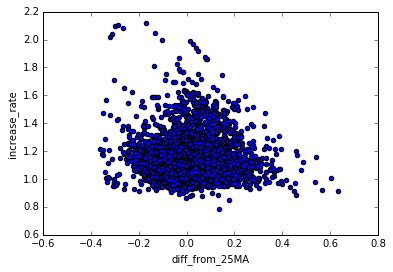

In [146]:
correlation.plot.scatter(x = 'diff_from_25MA', y = 'increase_rate')

In [150]:
def correlation_plot(days = 30):
    #乖離率と値上げの相関
    columns = ['max_close','diff_from_25MA', 'increase_rate']
    correlation = pd.DataFrame(columns = columns, )
        
    #tmpdata={'max_close':[], 'diff_from_25MA':[], 'increase_rate':[]}
    for date in data.index:
    #    #print(date)
        max_close = data['close'][date + offsets.Day(1):date + offsets.Day(days)].max()
        diff_from_25MA = data['Diff_from_25MA'][date]
        close = data.ix[date,'close']
        increase_rate = max_close/close
    
        correlation = correlation.append(pd.DataFrame([[max_close,diff_from_25MA,increase_rate]], columns=columns))
    correlation.plot.scatter(x = 'diff_from_25MA', y = 'increase_rate')

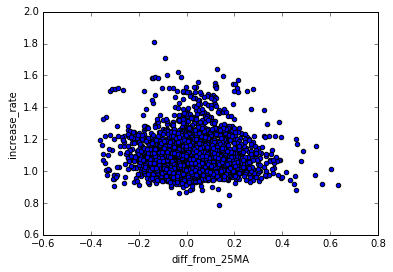

In [152]:
interact(correlation_plot, days=(1,60,1))

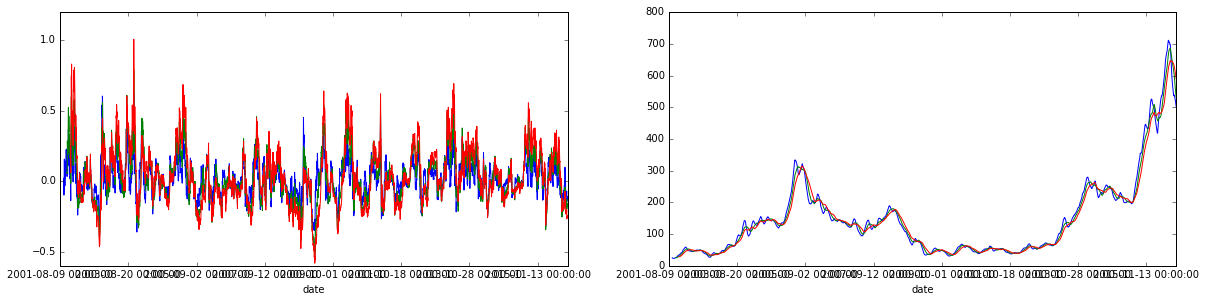

In [28]:
#plot
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
data.set_index('date')['Diff_from_25MA'].plot()
data.set_index('date')['Diff_from_50MA'].plot()
data.set_index('date')['Diff_from_75MA'].plot()
plt.subplot(2,2,2)
data.set_index('date')['25MA'].plot()
data.set_index('date')['50MA'].plot()
data.set_index('date')['75MA'].plot()